In [ ]:
# MNSIT data with dense neural net (Chollet)

Sample code to demonstrate the use of TensorFlow with the MNIST dataset

*   Adapted From *Deep Learning with Python* by Francis Chollet.
*   Adapted by Erik K. Grimmelmann
*   Last revision: 2022-10-23







In [ ]:
# choose if you want to display images of the input data and sample results

display_training_images = True
display_result_images = True

In [ ]:

# import tf

import tensorflow as tf
print ('Using TensorFlow version',tf.__version__)

Using TensorFlow version 2.9.2


In [ ]:
# import a bunch of stuff

from keras import datasets
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
import tensorflow_probability as tfp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load the MNIST dataset

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# examine at the training data

print('\nshape of images:',train_images.shape)
print('\nlength of labels',len(train_labels))
print('\nlabels:',train_labels)

dist_train = np.zeros(10, dtype=np.int16)
for j in range(len(train_labels)):
  dist_train[train_labels[j]] += 1
 
print ('\nnumber of training cases for each category')
for i in range(10):
  print (i, dist_train[i])


shape of images: (60000, 28, 28)

length of labels 60000

labels: [5 0 4 ... 5 6 8]

number of training cases for each category
0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


In [ ]:
# examine the test data

print('\nshape of images:',test_images.shape)
print('\nlength of labels',len(test_labels))
print('\nlabels:',test_labels)

dist_test = np.zeros(10, dtype=np.int16)
for j in range(len(test_labels)):
  dist_test[test_labels[j]] += 1
 
print ('\nnumber of test cases for each category')
for i in range(10):
  print (i, dist_test[i])


shape of images: (10000, 28, 28)

length of labels 10000

labels: [7 2 1 ... 4 5 6]

number of test cases for each category
0 980
1 1135
2 1032
3 1010
4 982
5 892
6 958
7 1028
8 974
9 1009


In [ ]:
# save test images in their current form for later, since the original images with be tranformed

saved_test_images = test_images

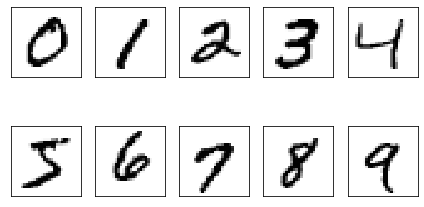

In [ ]:
# show the first digit of each class

if (display_training_images):
  fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
  ax = ax.flatten()
  for i in range(10):
      img = train_images[train_labels == i][0].reshape(28, 28)
      ax[i].imshow(img, cmap='Greys', interpolation='nearest')
  ax[0].set_xticks([])
  ax[0].set_yticks([])
  plt.tight_layout()
  plt.show()

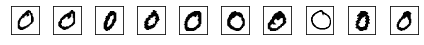

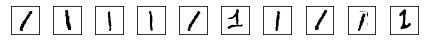

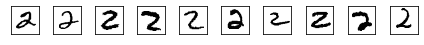

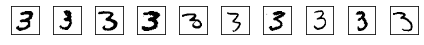

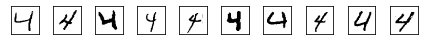

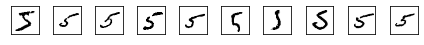

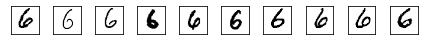

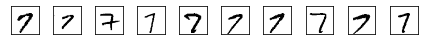

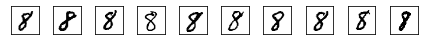

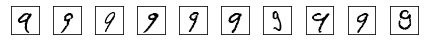

In [ ]:
# show the first 10 cases of each digit in the training data

if (display_training_images):
  for j in range(10):
      fig, ax = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True,)
      ax = ax.flatten()
      for i in range(10):
          img = train_images[train_labels == j][i]
          ax[i].imshow(img, cmap='Greys', interpolation='nearest')

      ax[0].set_xticks([])
      ax[0].set_yticks([])
      plt.tight_layout()
      plt.show()

In [ ]:
# setup the network architecture

# single dense hidden layer

model = models.Sequential()
model.add(layers.Dense(512,
                        activation='relu', 
                        input_shape=(28*28,)))
model.add(layers.Dense(10, 
                        activation='softmax'))
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy','categorical_crossentropy'])
batch_size = 128
epochs = 12

print ('using dense network with batch size of ', batch_size)

model.summary()

using dense network with batch size of  128
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# prepare the image data
#  reshape them from 28x28 to 784 pixels for the simple model

train_images = train_images.reshape((60000, 28 *28))
test_images = test_images.reshape((10000, 28 * 28))

print ('\nshape of training images:', train_images.shape)


shape of training images: (60000, 784)


In [ ]:
# change the gray-scale of the images from integers [0, ... , 255]
#   to floating-point numbers [0., ... 1.]

train_images = train_images.astype('float32')/255.
test_images = test_images.astype('float32')/255.

In [ ]:
# prepare the label data
#  change from categorical labels to one-hot-encoded labels

# examine a sample point
# this is an example of poor coding.  "train_labels" changes in mid-stream

j=3
print ('\ncategorical label:',train_labels[j])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print ('\none-hot label:',train_labels[j])


categorical label: 1

one-hot label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# train the network

history=model.fit(train_images,
            train_labels,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(test_images,test_labels))

Epoch 1/12
469/469 [==============================] - 9s 15ms/step - loss: 0.2593 - accuracy: 0.9250 - categorical_crossentropy: 0.2593 - val_loss: 0.1324 - val_accuracy: 0.9592 - val_categorical_crossentropy: 0.1324
Epoch 2/12
469/469 [==============================] - 5s 11ms/step - loss: 0.1053 - accuracy: 0.9684 - categorical_crossentropy: 0.1053 - val_loss: 0.0918 - val_accuracy: 0.9715 - val_categorical_crossentropy: 0.0918
Epoch 3/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0675 - accuracy: 0.9796 - categorical_crossentropy: 0.0675 - val_loss: 0.0969 - val_accuracy: 0.9722 - val_categorical_crossentropy: 0.0969
Epoch 4/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0497 - accuracy: 0.9849 - categorical_crossentropy: 0.0497 - val_loss: 0.0652 - val_accuracy: 0.9803 - val_categorical_crossentropy: 0.0652
Epoch 5/12
469/469 [==============================] - 5s 12ms/step - loss: 0.0368 - accuracy: 0.9888 - categorical_crossentropy: 0.0

In [ ]:
# print the history dictionary

print('\nhistory dict:', history.history)


history dict: {'loss': [0.25933846831321716, 0.10526721924543381, 0.06754834204912186, 0.049704499542713165, 0.03680972382426262, 0.028488799929618835, 0.022079795598983765, 0.0167180635035038, 0.012986323796212673, 0.010344556532800198, 0.007728624157607555, 0.006266559939831495], 'accuracy': [0.9250333309173584, 0.968416690826416, 0.9796000123023987, 0.9849166870117188, 0.9887833595275879, 0.9913833141326904, 0.9934999942779541, 0.9951000213623047, 0.9965166449546814, 0.9970166683197021, 0.997783362865448, 0.9983500242233276], 'categorical_crossentropy': [0.25933846831321716, 0.10526721924543381, 0.06754834204912186, 0.049704499542713165, 0.03680972382426262, 0.028488799929618835, 0.022079795598983765, 0.0167180635035038, 0.012986323796212673, 0.010344556532800198, 0.007728624157607555, 0.006266559939831495], 'val_loss': [0.13238191604614258, 0.09184577316045761, 0.09686427563428879, 0.06516437977552414, 0.06459835171699524, 0.06479756534099579, 0.05899753421545029, 0.07120668143033

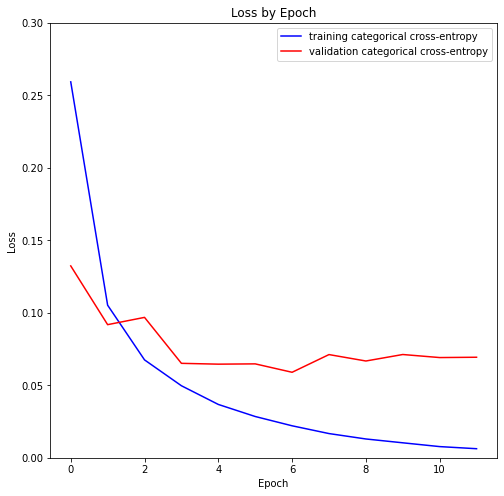

In [ ]:
# plot the loss

plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='training categorical cross-entropy', color='blue')
plt.plot(history.history['val_loss'], label='validation categorical cross-entropy', color='red')
plt.title('Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, .3])
plt.legend(loc='upper right')

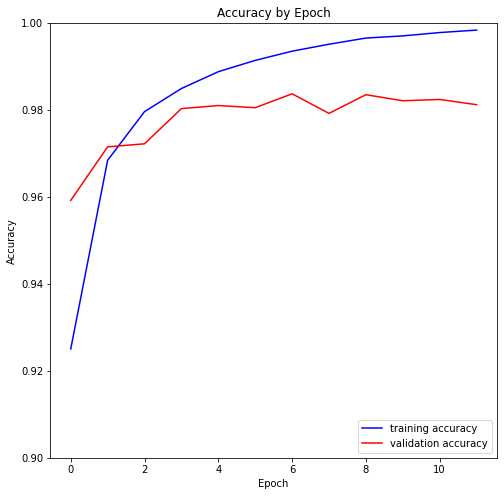

In [ ]:
# plot the acccuracy

plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], label='training accuracy',color='blue')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy',color='red')
plt.title('Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.])
plt.legend(loc='lower right')

In [ ]:
# apply the model to the testing data

test_evaluation = model.evaluate(test_images, test_labels)
test_loss = test_evaluation[0]
test_acc = test_evaluation[1]

print ('\ntest loss: ',test_loss)
print ('test acc:  ', test_acc)
print ('errors:  ', int(10000*(1-test_acc)))

313/313 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9812 - categorical_crossentropy: 0.0694

test loss:  0.06937014311552048
test acc:   0.9811999797821045
errors:   188


In [ ]:
# look at the label predictions for a test sample

pred_test_labels = model.predict(test_images)

j = 4

print ('\n         truth       prediction')
s = 0.
for i in range (10):
  print ('%3d' % i,
        '%13.10f' % test_labels[j,i],
        '%13.10f' % pred_test_labels[j,i])
  s += pred_test_labels[j,i]
print ('\nsum of predictions'+'%13.10f' % s)

# extract categorical label from predicted labels

print ('\ntrue label:               ',np.argmax(test_labels[j,:], axis = -1))
print ('predicted label:          ',np.argmax(pred_test_labels[j,:], axis = -1))
print ('probability of prediction:',pred_test_labels[j,np.argmax(pred_test_labels[j,:], axis = -1)])

313/313 [==============================] - 1s 3ms/step

         truth       prediction
  0  0.0000000000  0.0000000696
  1  0.0000000000  0.0000000000
  2  0.0000000000  0.0000000325
  3  0.0000000000  0.0000000011
  4  1.0000000000  0.9637380242
  5  0.0000000000  0.0000000014
  6  0.0000000000  0.0000000343
  7  0.0000000000  0.0000017311
  8  0.0000000000  0.0000001203
  9  0.0000000000  0.0362598412

sum of predictions 0.9999998557

true label:                4
predicted label:           4
probability of prediction: 0.963738


In [ ]:
# get the categories for all test cases

pred_test_labels = model.predict(test_images)

# convert the one-hot encoding values to a category
test_cat = np.argmax(test_labels,axis=-1)
pred_test_cat = np.argmax(pred_test_labels,axis=-1)

print ('\nshape of pred_test_labels:',pred_test_labels.shape)
print ('shape of test_labels:     ',pred_test_labels.shape)
print ('shape of test_cat:        ',test_cat.shape)
print ('shape of pred_test_cat:   ',pred_test_cat.shape)

313/313 [==============================] - 1s 3ms/step

shape of pred_test_labels: (10000, 10)
shape of test_labels:      (10000, 10)
shape of test_cat:         (10000,)
shape of pred_test_cat:    (10000,)


In [ ]:
# get ready to look at some misclassifications

correct_lab = test_cat[test_cat != pred_test_cat]
incorrect_lab = pred_test_cat[test_cat != pred_test_cat]
incorrect_image = saved_test_images[test_cat != pred_test_cat]
p_label = pred_test_labels[test_cat != pred_test_cat,:]
t_label = test_labels[test_cat != pred_test_cat,:]

print ('\nerrors:',len(incorrect_lab))
print ('\nshape of correct_lab:    ',incorrect_lab.shape)
print ('shape of incorrect_lab:  ',incorrect_lab.shape)
print ('shape of incorrect_image:',incorrect_image.shape)
print ('shape of p_label:        ',p_label.shape)
print ('shape of t_label:        ',t_label.shape)



errors: 188

shape of correct_lab:     (188,)
shape of incorrect_lab:   (188,)
shape of incorrect_image: (188, 28, 28)
shape of p_label:         (188, 10)
shape of t_label:         (188, 10)


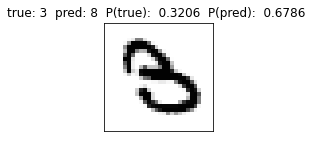

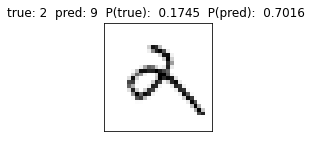

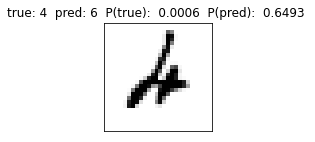

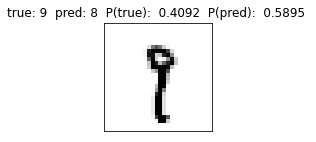

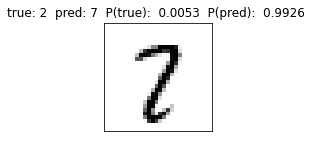

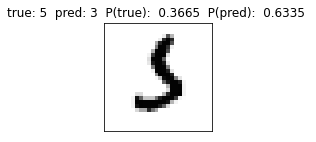

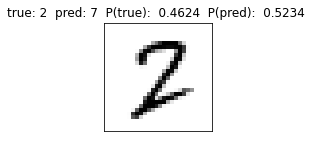

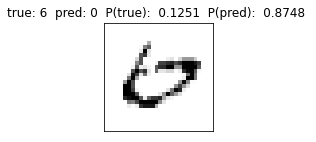

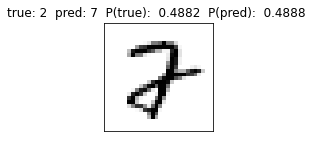

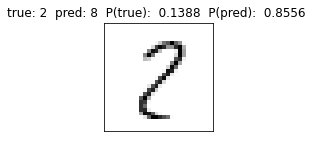

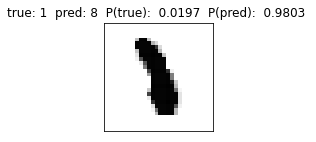

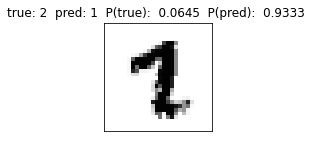

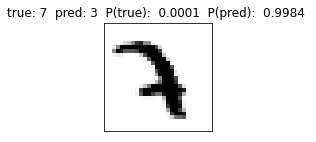

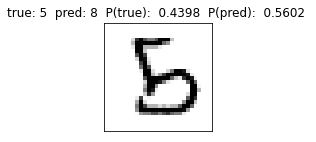

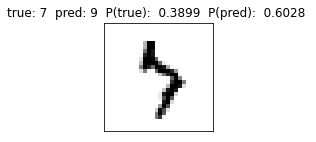

In [ ]:
# look at some misclassifications

if (display_result_images):
  number_of_cases = 15
  for i in range(min(number_of_cases,len(incorrect_lab))):
      img = incorrect_image[i].reshape(28,28)
      plt.figure(figsize=(2,2))
      plt.imshow(img, cmap='Greys', interpolation='nearest')
      plt.title('true: %d  pred: %d  P(true): %7.4f  P(pred): %7.4f ' % (correct_lab[i], incorrect_lab[i],p_label[i,correct_lab[i]],p_label[i,incorrect_lab[i]]))
      plt.xticks([])
      plt.yticks([])
      plt.show() 


sum of entries in each column; should be 0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

misclasifications for each true digit
[ 7. 13. 35. 14. 18. 20. 15. 29. 17. 20.]


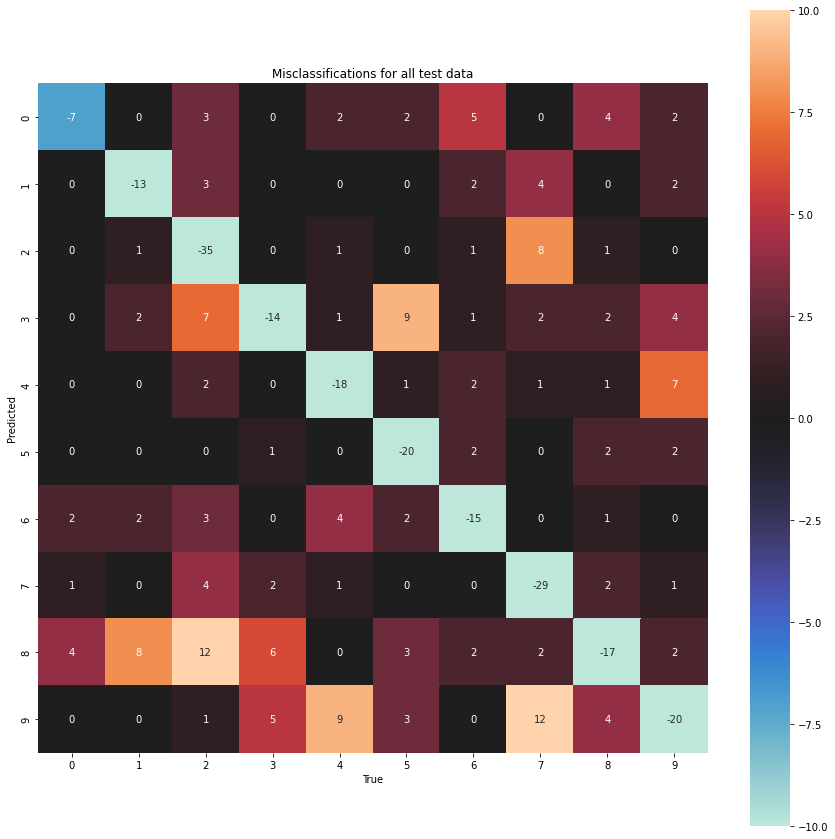

In [ ]:
# get heatmap of true vs predicted categories for all test data

hmap= np.zeros((10,10))
for k in range(10000):
  hmap[pred_test_cat[k],test_cat[k]] += 1
for i in range(10):
  hmap[i,i] -= dist_test[i]  

# check that columns sum to 0
hmap_columns = np.zeros(10)

for j in range(10):
  for i in range(10):
    hmap_columns[j] += hmap[i,j] 
print ('\nsum of entries in each column; should be 0')
print (hmap_columns)  

# find number of misclasifications by true value
mis_classifications = np.zeros(10)
for j in range(10):
  for i in range(10):
    mis_classifications[j] += abs(hmap[i,j])/2
print ('\nmisclasifications for each true digit')
print (mis_classifications)  

plt.figure(figsize=(15,15))
sns.heatmap(hmap, annot=True,fmt='.4g',vmin=-10, vmax=10, center= 0, square=True)
plt.title('Misclassifications for all test data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()


In [ ]:
# Calculate probability of misclassification for each true digit as other digit
#  This is important becuase the test data contains a different number of 
#  samples for each digit.
# Express the probablity as a percent

for j in range(10):
  for i in range(10):
    hmap[i,j] = 100. *abs(hmap[i,j]/dist_train[j])



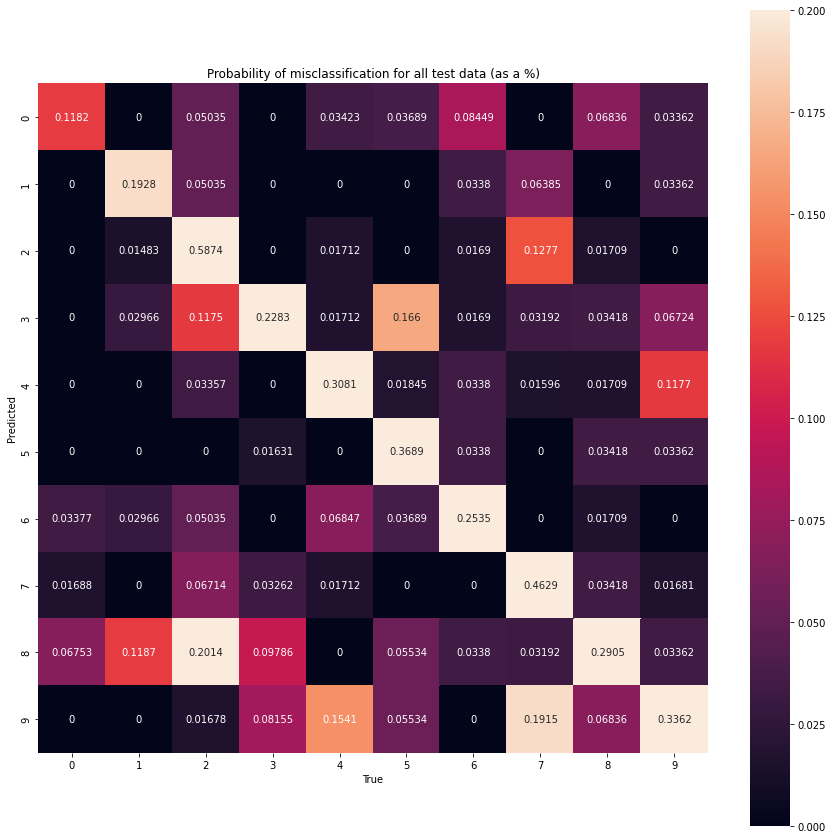

In [ ]:
# Plot probability of misclassification for each true digit as another digit

plt.figure(figsize=(15,15))
sns.heatmap(hmap, annot=True,fmt='.4g',vmin=-0., vmax=0.2, square=True)
plt.title('Probability of misclassification for all test data (as a %)')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# look at correlations of predicted probabilies

corr = tfp.stats.correlation(test_labels, pred_test_labels) 
print ('\nshape of corr',corr.shape)

# Note that we have to convert the corr tensor to the npcorr numpy array

npcorr = corr.numpy()
print ('\nshape of npcorr',npcorr.shape)



shape of corr (10, 10)

shape of npcorr (10, 10)


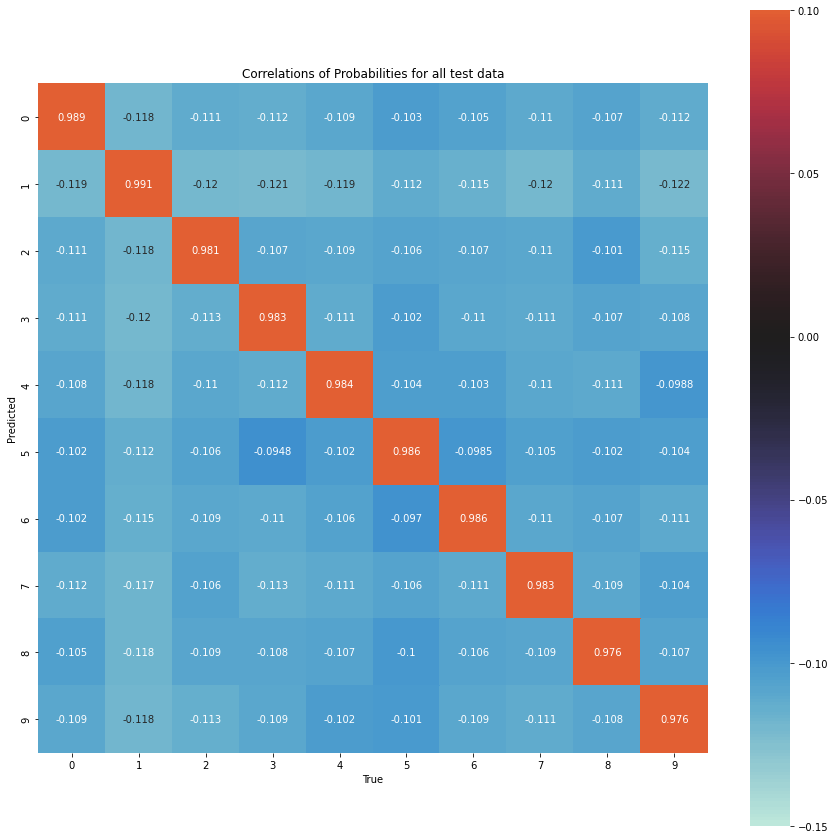

In [ ]:
# heatmap of true vs predicted probabilites for all test data

corr = tfp.stats.correlation(test_labels, pred_test_labels) 
npcorr = corr.numpy()

plt.figure(figsize=(15,15))
sns.heatmap(npcorr, annot=True,fmt='.3g',vmin=-0.15, vmax=0.1,center=0. , square=True)
plt.title('Correlations of Probabilities for all test data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()


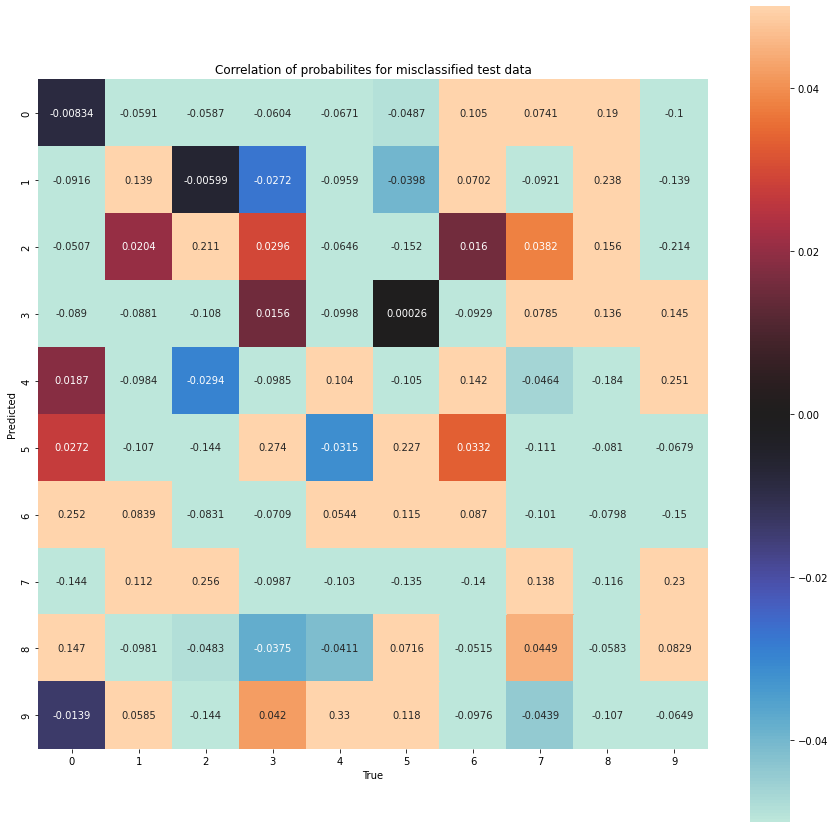

In [ ]:
# heatmap of true vs predicted probabilities for misclassificed test data

corr = tfp.stats.correlation(t_label, p_label) 
npcorr = corr.numpy()

plt.figure(figsize=(15,15))
sns.heatmap(npcorr, annot=True,fmt='.3g',vmin=-0.05, vmax=0.05, center= 0, square=True)
plt.title('Correlation of probabilites for misclassified test data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()


In [ ]:
# The End
print ('This is the end for now.')

This is the end for now.
